In [221]:
from tarfile import data_filter

import pandas as pd
import numpy as np
import importlib
from datetime import datetime
import matplotlib.pyplot as plt
from dask.dataframe import read_csv
from matplotlib.pyplot import xticks
from pandas.core.interchange.dataframe_protocol import DataFrame
from ply.cpp import xrange
from pygments.lexer import bygroups

import volpy_func_lib as vp
import load_clean_lib
import table_lib
from pathlib import Path
from global_settings import *

from datetime import datetime
from volpy_func_lib import load_forward_price

In [249]:
importlib.reload(vp)
importlib.reload(load_clean_lib)
importlib.reload(table_lib)

<module 'table_lib' from 'c:\\Users\\axell\\Desktop\\CBS\\master\\volpy\\table_lib.py'>

# Create Data

In [250]:
importlib.reload(vp)
importlib.reload(load_clean_lib)
importlib.reload(table_lib)


IV_type = "om" # om = OptionMetrics IV, "bid"/"ask"/"mid" price
om_folder = "i4s4_CW" #i4s4_CW, SPX_short
ticker_list = None #["SPX", "OEX"]

# Load data and clean
od, returns_and_prices, od_raw = load_clean_lib.load_clean_and_prepare_od(om_folder = om_folder, tickers = ticker_list, first_day = None, last_day = None, IV_type = IV_type)
print("Data loaded")

# Calculate results such as SW, RV ect.
summary_dly_df, od_rdy = load_clean_lib.create_summary_dly_df(od, returns_and_prices, first_day=None, last_day=None, n_grid=2000)
summary_dly_df = vp.interpolate_swaps_and_returns(summary_dly_df)
summary_dly_df = summary_dly_df.reset_index()

t_ was selected in global_settings.py
Data loaded


Processing Groups: 100%|██████████| 26834/26834 [00:23<00:00, 1164.38it/s]


In [251]:
summary_dly_df[(summary_dly_df['ticker']=="AMZN")][['date','ticker','RV','N_tradingdays']].dropna()

,date,ticker,RV,N_tradingdays
12953,1997-05-16,AMZN,0.776303,21.0
12954,1997-05-19,AMZN,0.634212,21.0
12955,1997-05-20,AMZN,0.632613,21.0
12956,1997-05-21,AMZN,0.610751,21.0
12957,1997-05-22,AMZN,0.417303,21.0
...,...,...,...,...
14403,2003-02-24,AMZN,0.023570,5.0
14404,2003-02-25,AMZN,0.029462,4.0
14405,2003-02-26,AMZN,0.037513,3.0
14406,2003-02-27,AMZN,0.041109,2.0


In [181]:
summary_dly_df.groupby("ticker").mean(numeric_only=True)

,index,#days,low days,high days,low #K,high #K,#K,low SW,high SW,Active,...,SW_m30_0,RV_m30_0,SW_month,SW_month_ln_ret,SW_month_ln_ret_RF,SW_m1_29,SW_0_29,SW_day,SW_sell,SW_buy
ticker,,,,,,,,,,,,,,,,,,,,,
AMZN,13507.0,3.995472,23.340377,62.080755,11.404528,15.406792,13.405660,1.007310,0.981595,0.700167,...,1.030637,0.947957,-0.086339,-0.179943,-0.180104,1.015189,1.014603,-0.003193,1.012345,1.015189
DJX,11706.0,5.804716,23.363301,53.560796,17.837878,17.997789,17.917833,0.065325,0.067609,0.752915,...,0.064759,0.044575,-0.020404,-0.520491,-0.520651,0.065519,0.065466,-0.000723,0.064771,0.065519
GE,900.0,4.558023,23.337590,60.821210,5.550805,7.595780,6.573293,0.127526,0.121677,0.958912,...,0.124732,0.110190,-0.013135,-0.206645,-0.206814,0.125327,0.125480,-0.000390,0.125016,0.125327
IBM,2701.0,4.060556,23.345556,62.055556,9.715556,12.857222,11.286389,0.163606,0.152002,0.998334,...,0.160040,0.152233,-0.007845,-0.180326,-0.180496,0.160109,0.160390,-0.000042,0.160100,0.160109
MSFT,4502.0,4.059967,23.353137,62.061077,8.848973,12.272626,10.560800,0.186721,0.180255,0.998334,...,0.185236,0.168065,-0.017230,-0.218530,-0.218700,0.185061,0.185151,-0.000478,0.184590,0.185061
NDX,6303.0,4.650750,23.337590,53.949473,37.039423,36.615769,36.827596,0.177170,0.173501,1.000000,...,0.176379,0.165828,-0.010550,-0.209807,-0.209977,0.176238,0.176343,-0.000245,0.175945,0.176238
OEX,8104.0,4.433093,23.337590,53.588007,33.555802,30.267074,31.911438,0.060437,0.061753,1.000000,...,0.060105,0.045568,-0.014537,-0.433574,-0.433745,0.060855,0.060825,-0.000520,0.060313,0.060855
SPX,9905.0,5.783454,23.337590,53.603554,33.886174,29.960022,31.923098,0.058316,0.059072,1.000000,...,0.057790,0.040821,-0.016969,-0.496291,-0.496461,0.058460,0.058448,-0.000579,0.057859,0.058460


### Skip at gemme od_rdy og od_raw hvis det skal gå hurtigt og man ikke er interesseret i options strategier (der skal bruge od_raw filen)

In [4]:
output_dir = load_clean_lib.volpy_output_dir(my_profile(), om_folder)
summary_dly_df.to_csv(f"{output_dir}/summary_dly.csv", index=False)
od_rdy.to_csv(f"{output_dir}/od_rdy.csv", index=False)
od_raw.to_csv(f"{output_dir}/od_raw.csv", index=False)

# Start from here

In [ ]:
input_dir = load_clean_lib.volpy_output_dir(my_profile(), om_folder)

sum_df = pd.read_csv(f"{input_dir}/summary_dly.csv")
sum_df["date"] = pd.to_datetime(sum_df["date"])

In [182]:
table_lib.CarrWu2009_table_1(summary_dly_df, print_latex = False)

,ticker,Starting_date,Ending_date,N,NK
7,SPX,04-Jan-1996,28-Feb-2003,1801,31.923098
6,OEX,04-Jan-1996,28-Feb-2003,1801,31.911438
1,DJX,06-Oct-1997,28-Feb-2003,1356,17.929572
5,NDX,04-Jan-1996,28-Feb-2003,1801,36.827596
4,MSFT,04-Jan-1996,28-Feb-2003,1798,10.572303
3,IBM,04-Jan-1996,28-Feb-2003,1798,11.295606
2,GE,08-Jan-1996,28-Feb-2003,1727,6.710770
0,AMZN,20-Nov-1997,28-Feb-2003,1261,13.921491


In [184]:
table_lib.CarrWu2009_table_2(summary_dly_df, print_latex = False)

,ticker,Mean_RV,Std_RV,Auto_RV,Skew_RV,Kurt_RV,Mean_SW,Std_SW,Auto_SW,Skew_SW,Kurt_SW
7,SPX,4.076896,3.361165,0.985582,2.126230,5.187277,5.847685,3.197008,0.957417,1.826089,4.165002
6,OEX,4.548644,3.741804,0.985477,2.043687,4.707428,6.087166,3.235368,0.961941,1.666498,3.155413
1,DJX,4.434313,3.653191,0.983347,2.098296,4.164027,6.553893,3.337411,0.938569,1.914467,4.434659
5,NDX,16.438813,15.689247,0.988227,2.506141,8.163223,17.622513,10.961898,0.982008,1.017725,0.422141
4,MSFT,16.667474,13.302412,0.979494,2.331510,6.212363,18.504657,9.936629,0.967105,2.146279,6.727891
3,IBM,15.040867,11.149959,0.973085,1.726086,3.387999,16.010174,8.084275,0.960005,1.881206,4.167744
2,GE,10.945324,8.660849,0.982086,2.158214,5.765184,12.532767,7.106587,0.972670,1.372569,2.200400
0,AMZN,93.075929,60.534702,0.972525,0.945983,0.585155,101.454462,54.947007,0.973963,1.517321,2.515979


In [183]:
table_lib.CarrWu2009_table_3(summary_dly_df, print_latex = False)

,ticker,Mean_diff,Std_diff,Auto_diff,Skew_diff,Kurt_diff,t_diff,Mean_ln,Std_ln,Auto_ln,Skew_ln,Kurt_ln,t_ln
7,SPX,-1.770788,3.042446,0.941228,0.186152,3.853420,-6.238699,-0.504781,0.545154,0.951485,0.265087,0.112604,-9.462219
6,OEX,-1.538522,3.276709,0.949289,0.670324,3.132725,-4.960348,-0.443151,0.549896,0.955221,0.313368,0.085495,-8.149880
1,DJX,-2.139615,3.668256,0.937588,0.406408,4.243301,-5.549104,-0.535965,0.598550,0.894843,0.182597,9.123377,-8.152438
5,NDX,-1.183701,10.079907,0.949904,2.474947,12.617322,-1.249670,-0.218828,0.443036,0.950355,0.472582,0.503879,-5.299725
4,MSFT,-1.843227,9.996351,0.930355,1.734967,6.809945,-2.073576,-0.229633,0.497620,0.937552,-0.291932,2.498132,-5.268509
3,IBM,-0.973396,9.166187,0.934483,1.072791,2.408206,-1.120752,-0.200539,0.577176,0.947344,-0.090171,0.109748,-3.614602
2,GE,-1.445694,6.645359,0.939412,2.043768,12.223802,-2.701262,-0.218286,0.450908,0.936685,0.436477,1.174995,-5.636026
0,AMZN,-8.878144,53.599798,0.933051,0.409265,1.698524,-1.662843,-0.201781,0.574683,0.943592,-0.099625,0.207028,-3.309010


In [25]:
summary_dly_df["RV_0_30-SW_0_30"] = summary_dly_df["RV"] - summary_dly_df["SW_0_30"]
table_lib.CarrWu2009_table_3_choose_stat(summary_dly_df, print_latex = False, stat = "RV_0_30-SW_0_30")

,ticker,Mean,Std,Auto,Skew,Kurt,t
2,SPX,-1.048730,5.543912,0.889571,5.597785,72.157790,-4.106317
1,NDX,-1.011220,7.513488,0.887299,3.626128,30.739749,-2.919585
0,AMZN,-3.177542,27.235323,0.932657,0.438570,12.017753,-2.573485


In [26]:
table_lib.CarrWu2009_table_3_choose_stat(summary_dly_df, print_latex = False, stat = "SW_day")

,ticker,Mean,Std,Auto,Skew,Kurt,t
2,SPX,-0.155356,2.411219,-0.149855,-1.132104,218.150680,-8.796444
1,NDX,-0.287172,3.011231,-0.171359,1.213152,148.795752,-11.416837
0,AMZN,-1.110101,6.382242,0.003362,-1.755100,76.649715,-9.724730


# Axel tester markedsværdier

kræver nedensetånde

In [ ]:
    # merged_df = summary_dly_df_reset.merge(
    #     real_vol[['date', 'ticker', 'RV', 'open', 'close', 'squared_return', 'return']],
    #     real_vol[['date', 'ticker', 'RV', 'N_tradingdays', 'open', 'close', 'squared_return', 'return']],
    #     left_on=['date', 'ticker'],
    #     right_on=['date', 'ticker'],
    #     how='left'

In [32]:
import pandas as pd
import numpy as np

ycc = pd.read_csv(r"C:\Users\axell\Desktop\CBS\data\OptionMetrics\i4s4_CW\ZC yield curve.csv")

# Sørg for, at 'date' er datetime i begge DataFrames
summary_dly_df["date"] = pd.to_datetime(summary_dly_df["date"])
ycc["date"] = pd.to_datetime(ycc["date"])

# Funktion til lineær interpolation af 29- og 30-dages renter for én dag
def interp_and_convert(group):
    group = group.sort_values("days")
    days = group["days"].values
    # Interpolér de årlige renter til 29 og 30 dage (årlige renter)
    annual_RF_29 = np.interp(29, days, group["rate"].values)
    annual_RF_30 = np.interp(30, days, group["rate"].values)
    # Konverter årlige renter til perioder (med fx 365 dage pr. år)
    RF_29 = (1 + annual_RF_29)**(29/365) - 1
    RF_30 = (1 + annual_RF_30)**(30/365) - 1
    return pd.Series({"RF_29": RF_29, "RF_30": RF_30})

# Gruppér yield curve data efter 'date' og interpolér
ycc_interp = ycc.groupby("date").apply(interp_and_convert).reset_index()

# Merge de interpolerede og konverterede rentesatser med summary_dly_df
summary_dly_df2 = pd.merge(summary_dly_df, ycc_interp, on="date", how="left")


C:\Users\axell\AppData\Local\Temp\ipykernel_3344\3131648911.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ycc_interp = ycc.groupby("date").apply(interp_and_convert).reset_index()


In [123]:
(summary_dly_df['SW_m1_29']-summary_dly_df['SW_0_29']).median()

0.00018660036313328937

In [175]:
def compute_market_value_short_variance(summary_dly_df):
    # Hvis SW_m1_29 ikke allerede findes, opret den som lag af SW_0_30 per ticker
    if "SW_m1_29" not in summary_dly_df.columns:
        summary_dly_df["SW_m1_29"] = summary_dly_df.groupby("ticker")["SW_0_30"].shift(1)
    if "N_tradingdays_lagged" not in summary_dly_df.columns:
        summary_dly_df["N_tradingdays_lagged"] = summary_dly_df.groupby("ticker")["N_tradingdays"].shift(1)
    
    # Beregn discount factor for 1 dag (antaget at RF er daglig rente i decimalform)
    summary_dly_df["discount_factor"] = 1 / (1 + summary_dly_df["RF"])

    # summary_dly_df["N_tradingdays_lagged"] = 21

    summary_dly_df["marketvalue"] = (
        + summary_dly_df["SW_m1_29"] # gammel swap rate 
        - summary_dly_df["SW_0_29"] * (summary_dly_df["N_tradingdays_lagged"]-1)/summary_dly_df["N_tradingdays_lagged"] # ny swap rate
        - summary_dly_df["squared_return"] / summary_dly_df["N_tradingdays_lagged"] * 252 
    ) * 1 # summary_dly_df["discount_factor"]
    
    # Sæt eventuelle NA-værdier til 0
    summary_dly_df["pnl_day"] = summary_dly_df["pnl_day"].fillna(0)
    
    return summary_dly_df


In [178]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_cumulative_pnl(summary_dly_df, ticker):
    """
    Plot cumulative PnL over time for a given ticker.
    
    Forudsætninger:
      - summary_dly_df indeholder kolonnerne 'date', 'pnl_day' og 'ticker'.
    """
    # Sørg for at 'date' er datetime, og sortér data for den angivne ticker
    summary_dly_df["date"] = pd.to_datetime(summary_dly_df["date"])
    df_ticker = summary_dly_df[summary_dly_df["ticker"] == ticker].sort_values("date")
    
    # Beregn den kumulative PnL
    df_ticker["cum_pnl"] = df_ticker["marketvalue"].cumsum()
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(df_ticker["date"], df_ticker["cum_pnl"], label=ticker)
    plt.xlabel("Date")
    plt.ylabel("Cumulative PnL")
    plt.title(f"Cumulative PnL Over Time for {ticker}")
    plt.legend()
    plt.grid(True)
    plt.show()


In [176]:
summary_dly_df2 = compute_market_value_short_variance(summary_dly_df2)


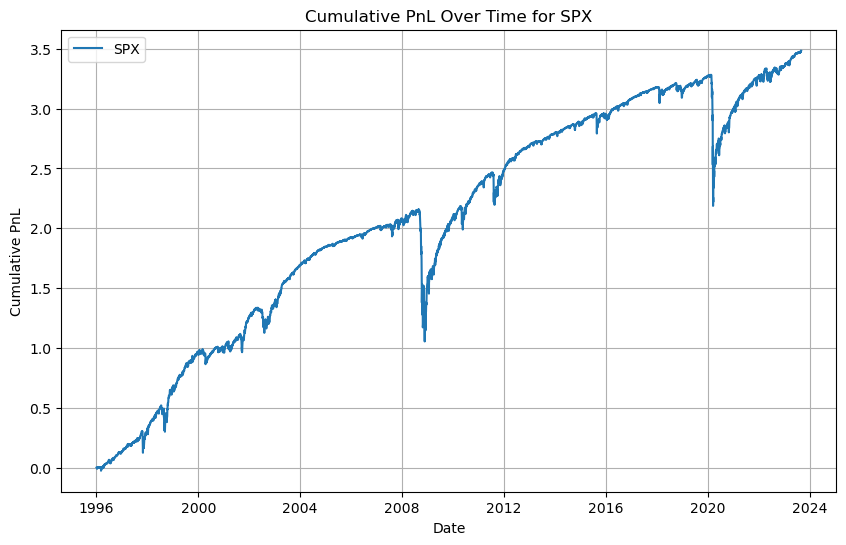

In [179]:
plot_cumulative_pnl(summary_dly_df2, "SPX")

# Not cleaned below

In [47]:
importlib.reload(vp)
importlib.reload(load_clean_lib)
importlib.reload(table_lib)

<module 'table_lib' from 'D:\\Professionelt\\Code\\volpy\\table_lib.py'>

In [5]:
def one_ticker(summary_dly_df, ticker = "SPX"):
    df_ticker = summary_dly_df[summary_dly_df["ticker"] == ticker].reset_index(drop = True)
    df_ticker = df_ticker[df_ticker["SW_day_return"].isna() == False]
    return df_ticker

In [6]:
df = one_ticker(summary_dly_df, "SPX")

In [7]:
max(np.maximum(df["SW_sell"], 0.001))

1.173559018807811

In [8]:
min(np.maximum(df["SW_sell"], 0.001) / np.maximum(df["SW_buy"], 0.001) - 1)

-0.9615923636030196

In [16]:
np.cumprod(2 - np.maximum(df["SW_sell"], 0.001) / np.maximum(df["SW_buy"], 0.001))

1        1.086992e+00
2        1.184104e+00
3        5.494757e-01
4        5.735089e-01
5        7.100811e-01
            ...      
6958     6.303410e-99
6959     7.004216e-99
6960     6.039512e-99
6961     1.003207e-98
6962   -3.645868e-100
Length: 6962, dtype: float64

In [45]:
summary_dly_df["ticker"].unique()

array(['NDX', 'SPX', 'AMZN'], dtype=object)

In [66]:
df = one_ticker(summary_dly_df, "NDX")

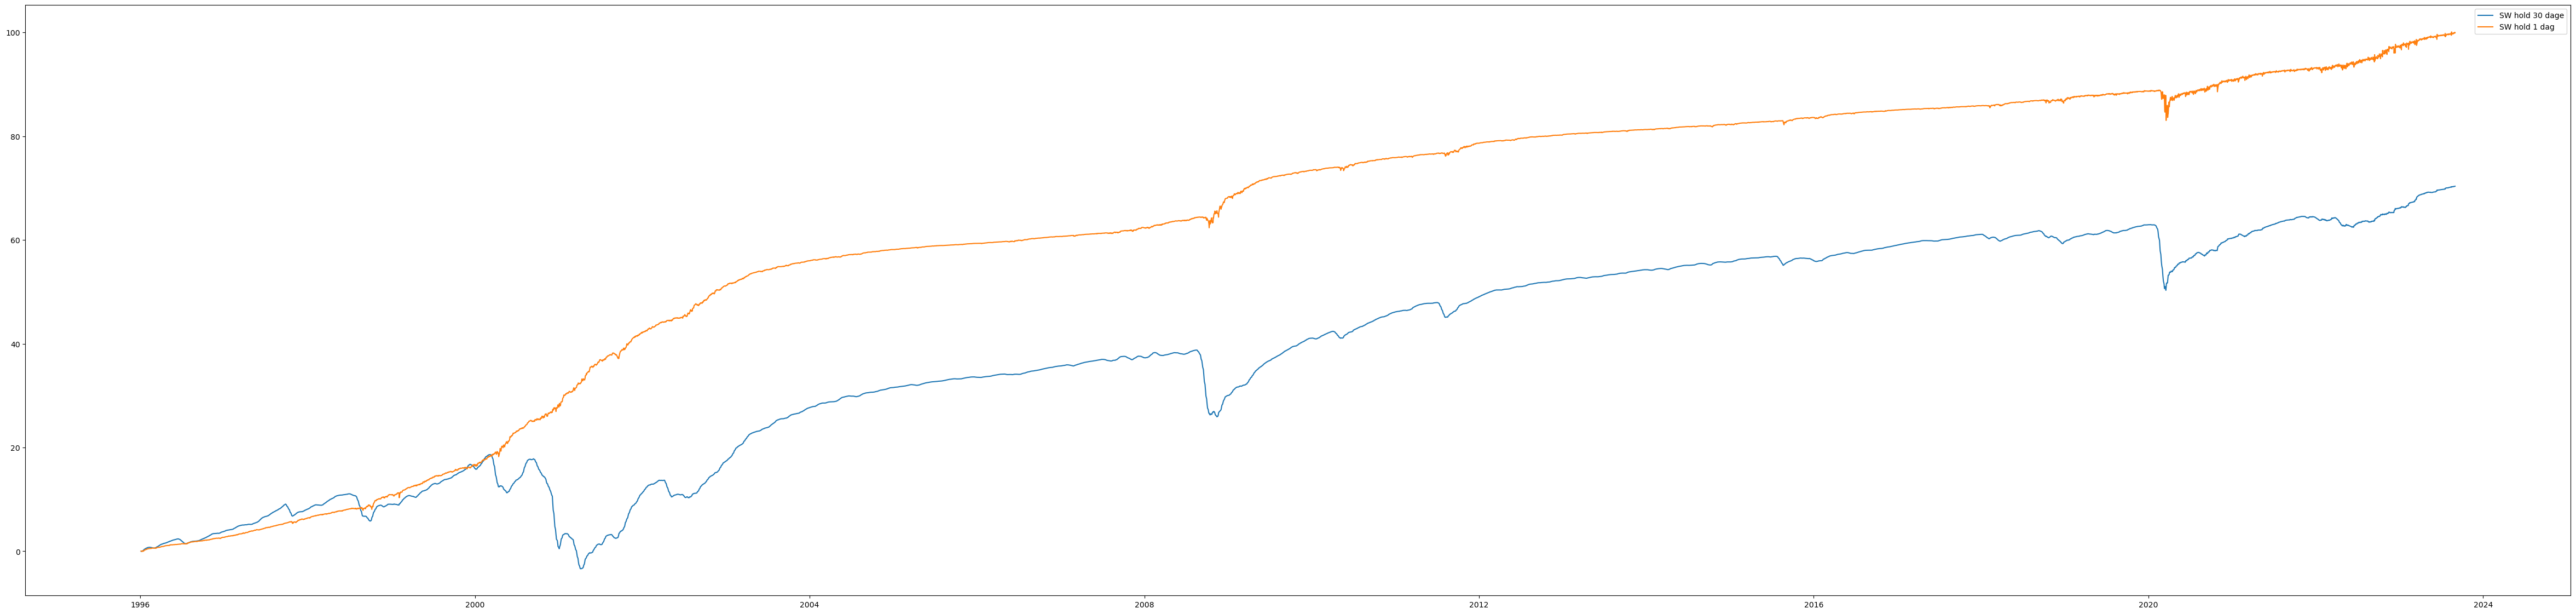

In [67]:
plt.figure(figsize=(60, 14))
plt.plot( df["date"] , np.cumsum((df["SW_0_30"] - df["RV"] )) , label = "SW hold 30 dage")
plt.plot( df["date"] , -5*np.cumsum(df["SW_day"]), label = "SW hold 1 dag")
plt.legend()
plt.show()

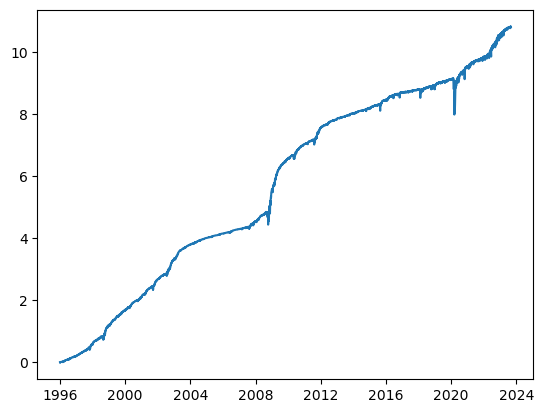

In [21]:
plt.plot( df["date"] , np.cumsum(-df["SW_day"]))
plt.show()

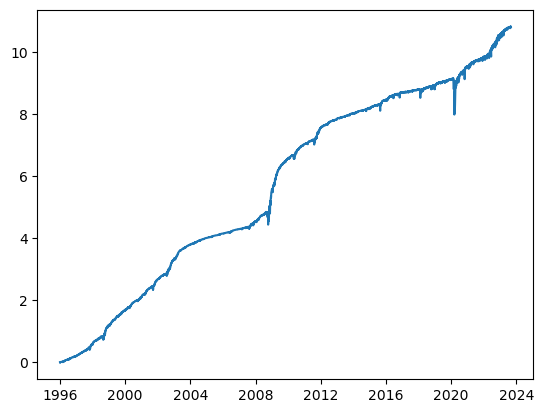

In [18]:
plt.plot( df["date"] , -np.cumsum(df["SW_day"]))
plt.show()

In [ ]:
plt.plot( df["date"] , df["SW_day"])
plt.show()

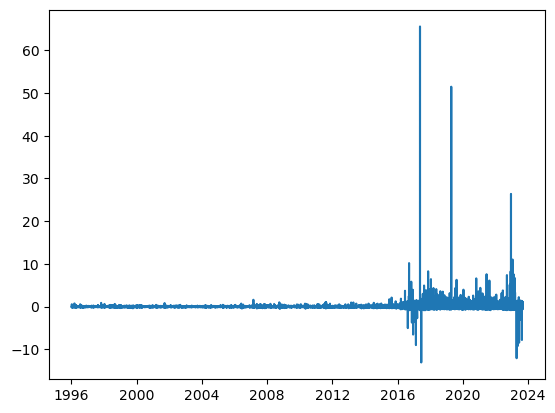

In [20]:
plt.plot( df["date"] , df["SW_day_return"])
plt.show()

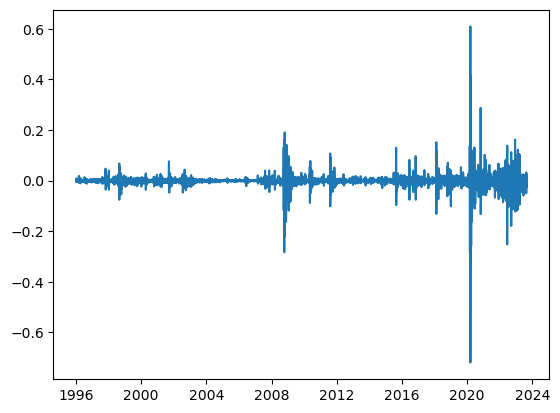

In [19]:
plt.plot( df["date"] , df["SW_day"])
plt.show()

In [37]:
SPX

,ticker,date,#days,low days,high days,low #K,high #K,#K,low SW,high SW,...,RV,open,squared_return,SW_0_30,SW_m1_29,SW_0_29,SW_day,SW_day_return,SW_sell,SW_buy
1,SPX,1996-01-05,6.0,15.0,43.0,26.0,24.0,25.0,0.017910,0.016568,...,0.015841,617.70,0.000003,0.016880,0.017860,0.016869,-0.001554,-0.086992,0.016307,0.017860
2,SPX,1996-01-08,6.0,12.0,40.0,20.0,24.0,22.0,0.016703,0.015776,...,0.016645,616.71,0.000008,0.015908,0.016880,0.015901,-0.001508,-0.089340,0.015372,0.016880
3,SPX,1996-01-09,6.0,11.0,39.0,23.0,24.0,23.5,0.039962,0.023438,...,0.016908,618.46,0.000212,0.025385,0.015908,0.025269,0.008526,0.535957,0.024434,0.015908
4,SPX,1996-01-10,6.0,10.0,38.0,21.0,25.0,23.0,0.033677,0.024267,...,0.015500,609.45,0.000324,0.025163,0.025385,0.025101,-0.001110,-0.043738,0.024275,0.025385
5,SPX,1996-01-11,6.0,9.0,37.0,17.0,24.0,20.5,0.019887,0.019826,...,0.011791,598.48,0.000049,0.019830,0.025163,0.019830,-0.005992,-0.238134,0.019171,0.025163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6958,SPX,2023-08-25,42.0,4.0,5.0,119.0,126.0,122.5,0.013806,0.015857,...,0.015730,4389.38,0.000045,0.022693,0.024453,0.021161,-0.003996,-0.163412,0.020457,0.024453
6959,SPX,2023-08-28,42.0,2.0,3.0,112.0,182.0,147.0,0.019612,0.020260,...,0.016819,4426.03,0.000039,0.021428,0.022693,0.020864,-0.002523,-0.111179,0.020170,0.022693
6960,SPX,2023-08-29,42.0,2.0,3.0,189.0,175.0,182.0,0.022140,0.023731,...,0.019129,4432.75,0.000210,0.026595,0.021428,0.025213,0.002951,0.137732,0.024379,0.021428
6961,SPX,2023-08-30,42.0,2.0,6.0,160.0,136.0,148.0,0.022032,0.011503,...,0.002173,4500.34,0.000015,0.007291,0.026595,0.009324,-0.017581,-0.661073,0.009014,0.026595


In [158]:
SPX["SW_buy"]

1       0.017484
2       0.016494
3       0.015528
4       0.025016
5       0.024791
          ...   
6958    0.024387
6959    0.022696
6960    0.021470
6961    0.026605
6962    0.007231
Name: SW_buy, Length: 6962, dtype: float64

In [38]:
SPX["SW_sell"].min()

-0.00028882011915477905

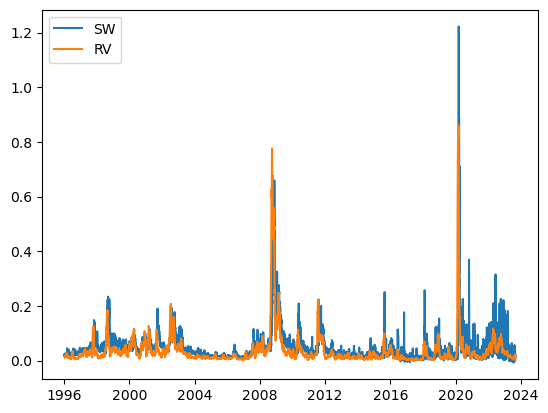

In [39]:
plt.plot(SPX["date"], SPX["SW_0_30"], label = "SW")
plt.plot(SPX["date"], SPX["RV"], label = "RV")
plt.legend()
plt.show()

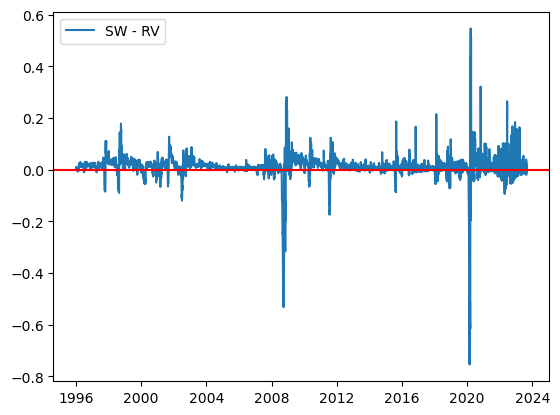

In [40]:
plt.plot(SPX["date"], SPX["SW_0_30"] - SPX["RV"], label = "SW - RV")
plt.legend()
plt.axhline(y=0, color = "red")
plt.show()

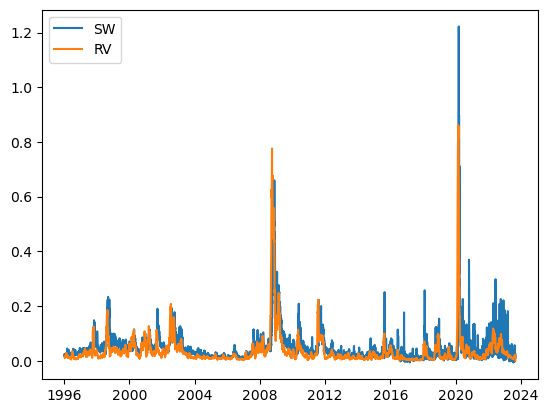

In [165]:
plt.plot(SPX["date"], SPX["SW_0_30"], label = "SW")
plt.plot(SPX["date"], SPX["RV"], label = "RV")
plt.legend()
plt.show()

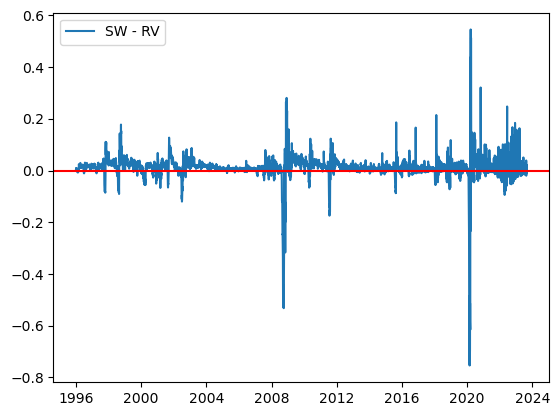

In [171]:
plt.plot(SPX["date"], SPX["SW_0_30"] - SPX["RV"], label = "SW - RV")
plt.legend()
plt.axhline(y=0, color = "red")
plt.show()

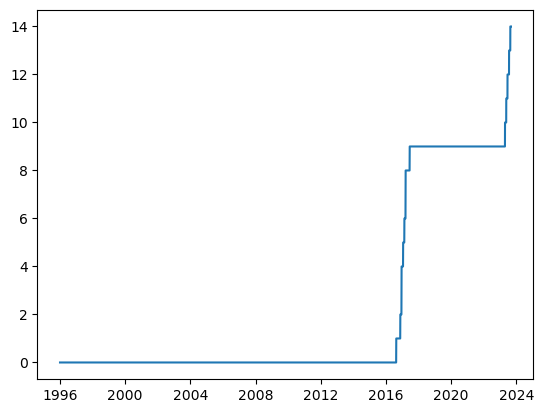

In [41]:
plt.plot(SPX["date"], np.cumsum(SPX["SW_buy"]<0))

In [43]:
min(SPX["SW_sell"]/SPX["SW_buy"]-1)

-13.100232650793211

In [44]:
max(SPX["SW_sell"]/SPX["SW_buy"]-1)

65.5856150940696

In [45]:
np.mean(SPX["SW_sell"]/SPX["SW_buy"]-1)

0.049239789338758916